<h1>Chua Circuit</h1>
<h2>Solving the differential equations numerically</h2>


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
C1  = 10*10**(-9)
C2  = 100*10**(-9)
R = 1.97*10**3
G = 1/R
L = 18*10**(-3)
R1 = 220
R2 = 220
R3 = 2200
R4 = 22000
R5 = 22000
R6 = 3300
Esat = 9
E1 = R3/(R2+R3)*Esat
E2 = R6/(R5+R6)*Esat
E = 1
m = np.array([-1/R6,1/R4, 1/R1,-1/R3])

def chuaDiodeHelper(x,E1,E2,m):
    m1 = m[0]+m[3]
    if(E1>E2):
        m0 = m[3] + m[1]
    else:
        m0 = m[0] + m[2]   


    mm1 = m[2] + m[1]
    Emax = max([E1 , E2])
    Emin = min([E1 , E2])


    if abs(x) < Emin:
        g = x*m1     
    elif Emin < abs(x) < Emax :
        g = x*m0
        if x > 0:
            g += Emin*(m1-m0)   
        else:
            g += Emin*(m0-m1) 


    elif abs(x) >= Emax:
        g = x*mm1    
        if x > 0:
            g = g + Emax*(m0-mm1) + Emin*(m1-m0)
        else:
            g = g + Emax*(mm1-m0) +  Emin*(m0-m1)
    return g

def chuaDiode(v):
    return chuaDiodeHelper(v,E1,E2,m)

def chuaCircuit(t, b, params):
    x,y,z = b     
    G,C1,C2,L = params 
    derivs = [(1/C1)*(G*(y-x)-chuaDiode(x)), (1/C2)*(G*(x-y)+ z), -(1/L)*y]
    return derivs

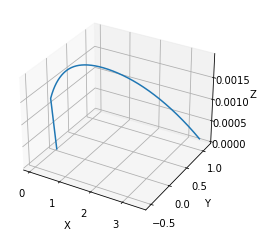

In [8]:
params = [G,C1,C2,L]
sol = solve_ivp(chuaCircuit, [0, 30], [0.05,0,0], args=[params],dense_output=True)

t = np.linspace(0, 30, 500)
p = sol.sol(t)
x = p[0]
y = p[1]
z = p[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()